<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/neural_network_non_linear_classification_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with Tensorflow

In the notebooks we're going to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

Afew tyypes of clasification problems:

* Binary classification
* Multiclss classification
* Multilabel Classification

## Creating data to view and fit

In [2]:

from sklearn.datasets import make_circles
import tensorflow as tf

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
#Check the features

X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
#Check the labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand now.. let's visualize it!

In [3]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


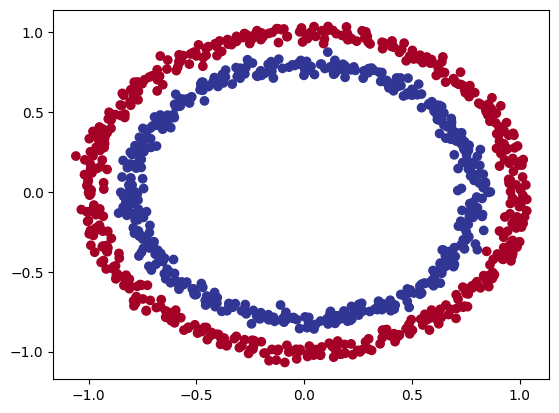

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

#Input amd output shapes

In [ ]:
# Check the shapes of our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
#How many samples we're working with

len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of feat ures and labels

X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typlically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [ ]:
#Set the dandom seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.6918 - accuracy: 0.4720
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0458 - accuracy: 0.4720
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.6399 - accuracy: 0.4890
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.5010


In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5030


[0.6989783644676208, 0.503000020980835]

In [ ]:
#Let's try and improve our model by training for longer...

model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binay classification problem and our model is getting around ~50% accuracy... It's performing as if it's guessing.

So let's step things up a notch and add a extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6936333775520325, 0.5]

In [ ]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

#Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create our model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function as Adam or SGD.
3. Fitting a model - perhaps we might fi our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
# 4. Evaluate the model

model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5040


[0.6976413726806641, 0.5040000081062317]

To visualize our models predictions let's create a function `plot_desicion_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predicitions accross meshgrid
* Plot the predictions aas wel as line between zones (where each unique class falls)

In [5]:
import numpy as np

In [5]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  1. https://cs231n.github.io/neural-networks-case-study/
  2. https://madewithml.com/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html


  # Make prediction

  y_pred = model.predict(x_in)

  # Check fot multi-classs

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")

    #We have to reshape our predciton to get them ready for plotting

    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation")
    y_pred = np.round(y_pred).reshape(xx.shape)


  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


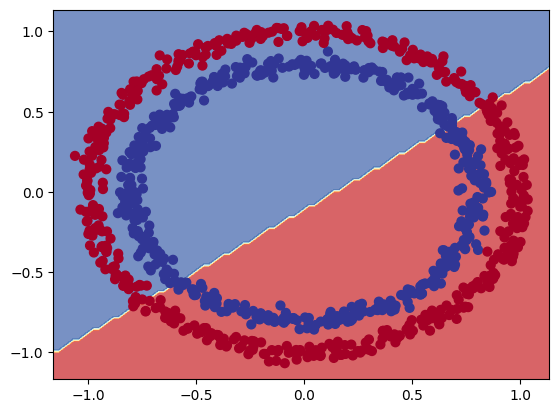

In [ ]:
# Check out the predictions our model is making

plot_decision_boundary(model_3, X, y)

# Let's see if our model can be used for a regression problem...


In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input=(None, 1)), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["mae"])


In [ ]:
tf.random.set_seed(42)

# Create some regression data

X_regression = tf.range(0, 1000, 5)

y_regression = tf.range(100, 1100, 5)

X_regression, y_regression


# Let's split ou regression data into training and test sets

X_regression_train = X_regression[:150]
X_regression_test = X_regression[150:]

y_regression_train = y_regression[:150]
y_regression_test = y_regression[150:]

#Fit our model to the regresion dta



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(), # Set optiomizer as Adam
              metrics=["mae"])


model_3.fit(tf.expand_dims(X_regression_train, axis=-1), y_regression_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 402.1476 - mae: 402.1476
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 283.0739 - mae: 283.0739
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 167.5648 - mae: 167.5648
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 57.1168 - mae: 57.1168
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 75.5504 - mae: 75.5504
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 82.0813 - mae: 82.0813
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 51.6255 - mae: 51.6255
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.2736 - mae: 51.2736
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0814 - mae: 47.0814
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 45.2896 - mae: 45.2896
Epoch 11/100
5/5 [==============================] - 0

In [ ]:
model_3.evaluate(tf.expand_dims(X_regression_test, axis=-1), y_regression_test)

2/2 [==============================] - 0s 7ms/step - loss: 60.0378 - mae: 60.0378


[60.03777313232422, 60.03777313232422]

2/2 [==============================] - 0s 6ms/step


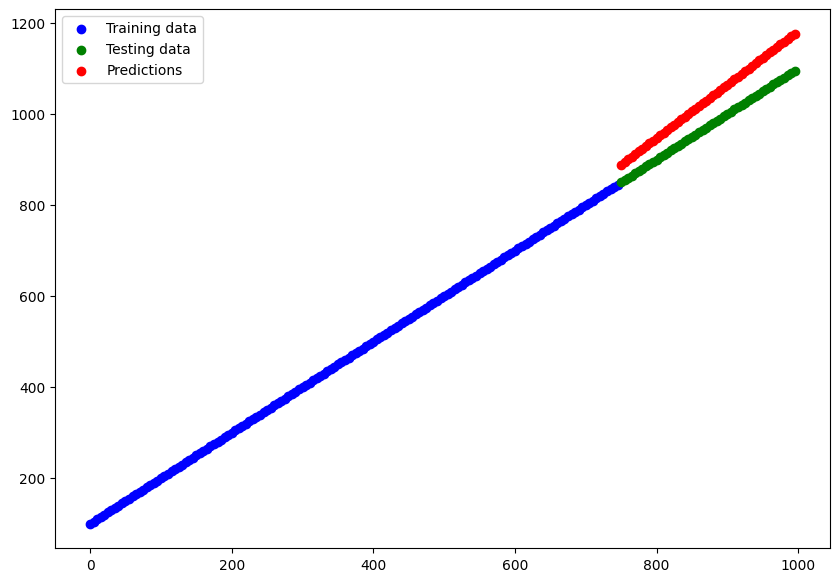

In [ ]:
y_reg_preds = model_3.predict(tf.expand_dims(X_regression_test, axis=-1))

plt.figure(figsize=(10, 7))
plt.scatter(X_regression_train, y_regression_train, c="b", label="Training data")
plt.scatter(X_regression_test, y_regression_test, c="g", label="Testing data")
plt.scatter(X_regression_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

# The missing piece: Non linearity

In [ ]:
# Set the random sed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3. Fit the model

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9787 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9503 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9163 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9097 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8778 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8408 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8150 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7816 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7617 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7496 - accuracy: 0.4850
Epoch 11/

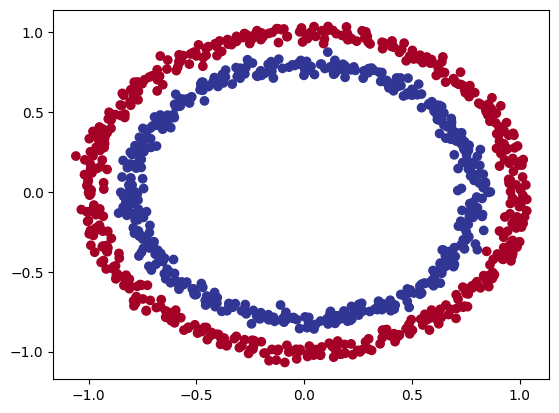

In [6]:
# Check our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


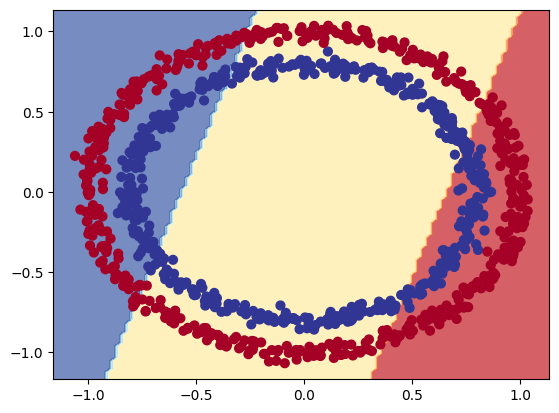

In [ ]:
#Check the decision bpundary for our latest model

plot_decision_boundary(model_4, X, y)

Let's try our first neural network with a non-linear activiation function.

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.7593 - accuracy: 0.4840
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7525 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7509 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7492 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7475 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7458 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7439 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7343 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5620 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5400 - accuracy: 0.4840
Epoch 11/

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1

y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

# Time to replicate multi-layer neural from Tensor flow playground encode

[Playground example](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75063&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)




In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history =  model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model

model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


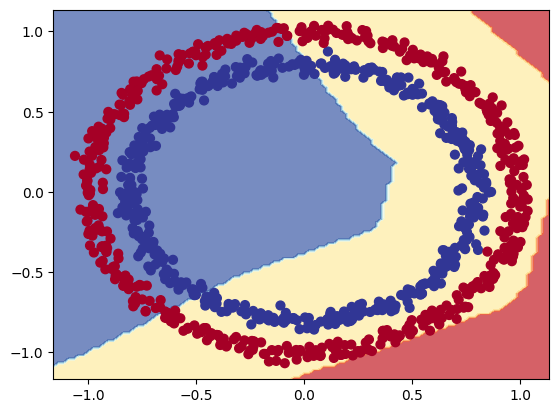

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

# 3. Fit the model
history =  model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6887 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5130
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5270
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5400
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5440
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6847 - accuracy: 0.5290
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5260
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5280
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6826 - accuracy: 0.5480
Epoch 11/

In [ ]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.9760


[0.26056697964668274, 0.9760000109672546]

## Let's visualize our incredible metrics

313/313 [==============================] - 1s 3ms/step
doing binary classifcation


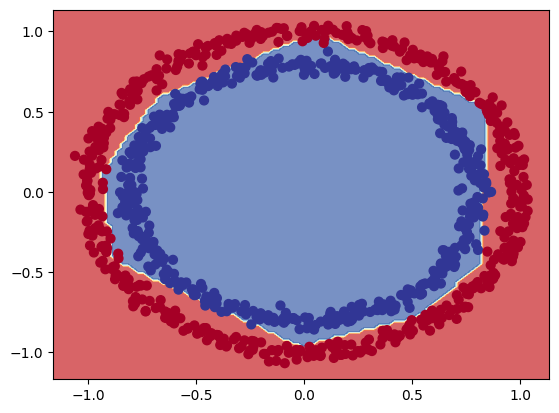

In [ ]:
plot_decision_boundary(model_7, X, y)

😯**Question:** what are worong with the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action

In [ ]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

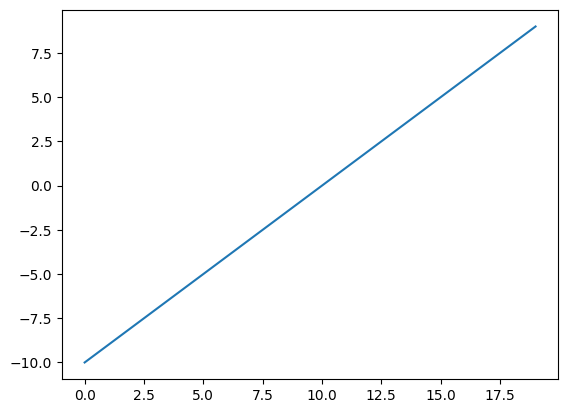

In [ ]:
# Visualize all toy tensor

plt.plot(A)

In [ ]:

# Let's try replicating sigmoid

def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

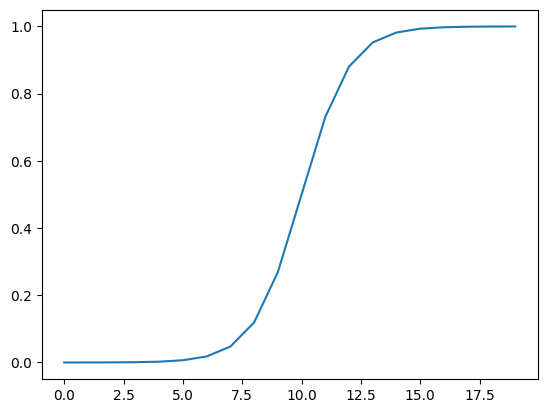

In [ ]:
# Plot orur toy tensor trnsformto by sigmoid

plt.plot(sigmoid(A))

In [ ]:
# Let's recreate relu function

def relu(x):
  return tf.maximum(0, x)

# PAss our toy tensor to relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

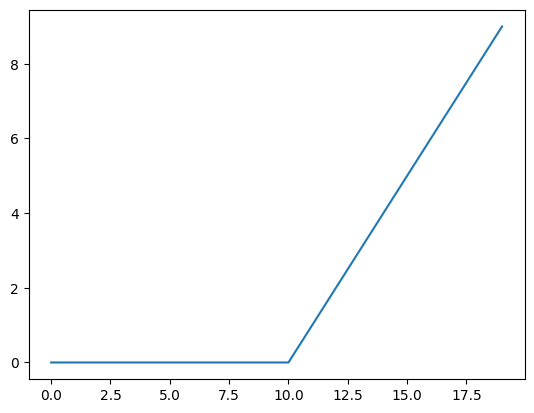

In [ ]:
plt.plot(relu(A))

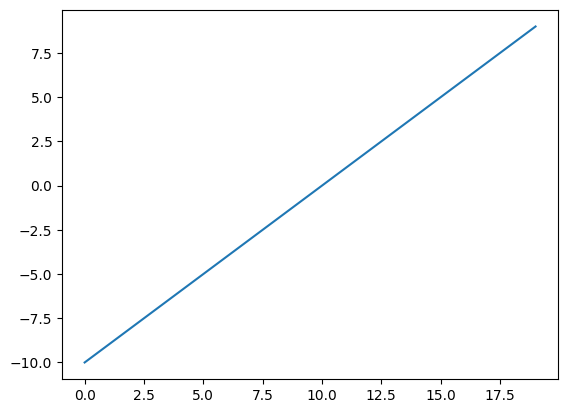

In [ ]:
plt.plot(A)

In [ ]:
# Let's try the linear activation function

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

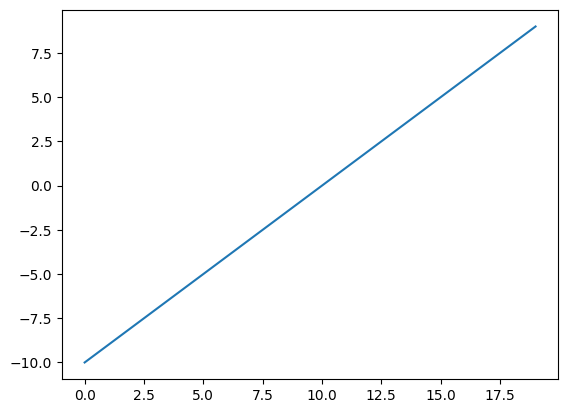

In [ ]:
# Does the linear action function change anything?

plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does A even change?

A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

##Evaluating and improving our classification

So far we've been training model and testing on the same dataset...

However, in machine learning this is basicalyy a sin.

So let's create a training and test set

In [ ]:
# Check how many examples we have

len(X)

1000

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics=['accuracy']
)

model_8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6900 - accuracy: 0.4913
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6896 - accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5138
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.5175
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6877 - accuracy: 0.5175
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5225
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5275
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5312
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6855 - accuracy: 0.5675
Epoch 11/

In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3161 - accuracy: 0.9650


[0.31614819169044495, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation
313/313 [==============================] - 1s 2ms/step
doing binary classifcation


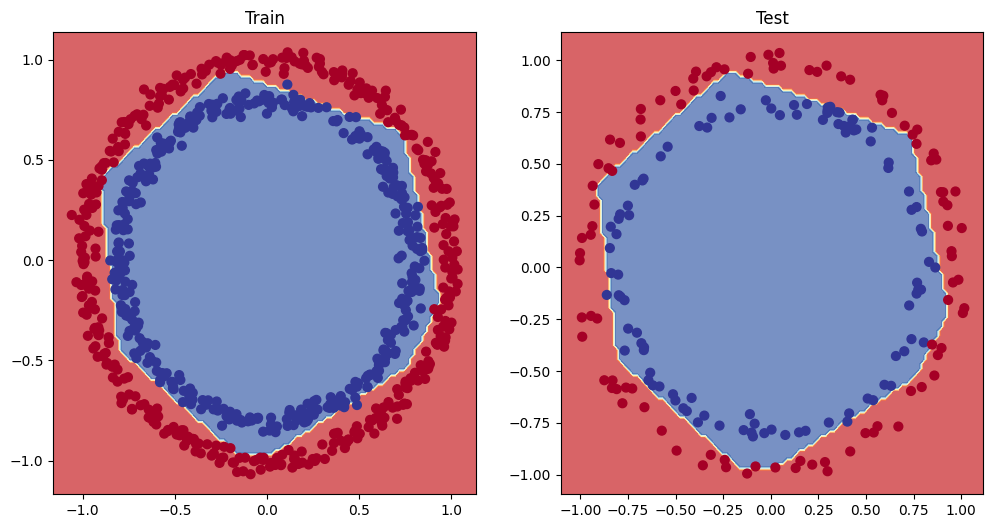

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
history.history

{'loss': [0.6886577010154724,
  0.6879824995994568,
  0.6873505115509033,
  0.6868004202842712,
  0.6861931085586548,
  0.685586154460907,
  0.684718132019043,
  0.6840757727622986,
  0.683275580406189,
  0.6825748085975647,
  0.6817280054092407,
  0.6808805465698242,
  0.6799850463867188,
  0.6790182590484619,
  0.6777462363243103,
  0.676436722278595,
  0.6753363013267517,
  0.6739487648010254,
  0.6726524233818054,
  0.6711866855621338,
  0.6697492599487305,
  0.6680564284324646,
  0.6663987040519714,
  0.6646745204925537,
  0.6628797054290771,
  0.660574197769165,
  0.6589124202728271,
  0.6561480164527893,
  0.654133677482605,
  0.6515810489654541,
  0.6490113139152527,
  0.6463840007781982,
  0.6429514288902283,
  0.6397027373313904,
  0.6350338459014893,
  0.6307613849639893,
  0.6269220113754272,
  0.6231973767280579,
  0.6187819242477417,
  0.6148906946182251,
  0.6103094816207886,
  0.6058902740478516,
  0.6005053520202637,
  0.5956517457962036,
  0.5862447619438171,
  0.5734

Text(0.5, 1.0, 'Model_8 loss curves')

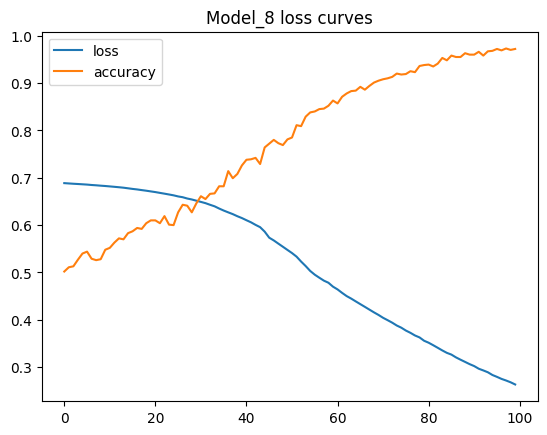

In [ ]:
# Convert the histry to a Dataframe and plot the curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

🔑 **Note:** For many problems . the loss functions going down mens the model is improving (the predictions it's making are getting closer to the ground truth labels)

## Finding the best leanrning rate

To find the ideal learning rate (the learning rate whre the loss decreaes the most during training) we're going to use the following steps:

* A leaning rate **callback** - you can thik of a callback as an extra piece of functiionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

history = model_9.fit(X_train, y_train, epochs=100, callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7041 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7037 - accuracy: 0.5038 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7029 - accuracy: 0.5025 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7025 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7020 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

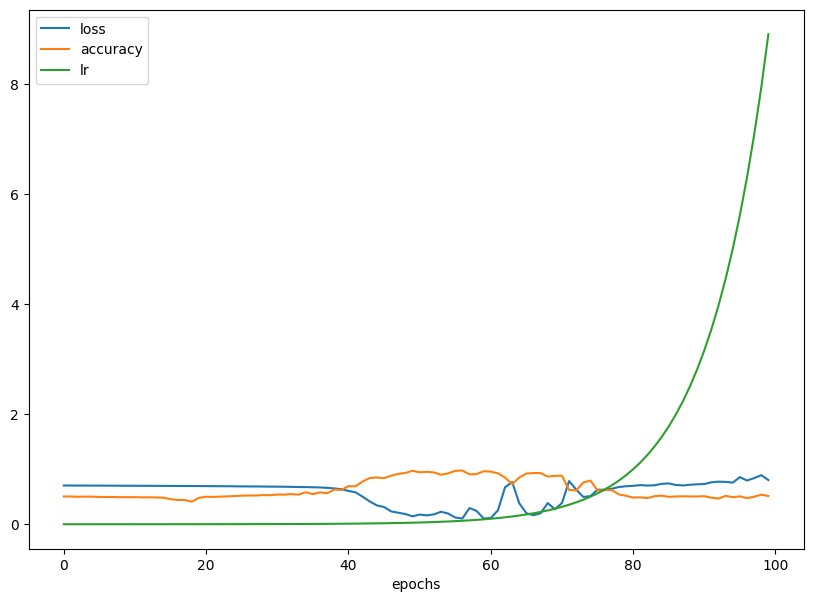

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")

In [ ]:
# Plot the leanig rate versos loss

In [ ]:
lrs = 1e-4 * (10**(tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lrs)

100

Text(0.5, 1.0, 'Learning rate vs Loss')

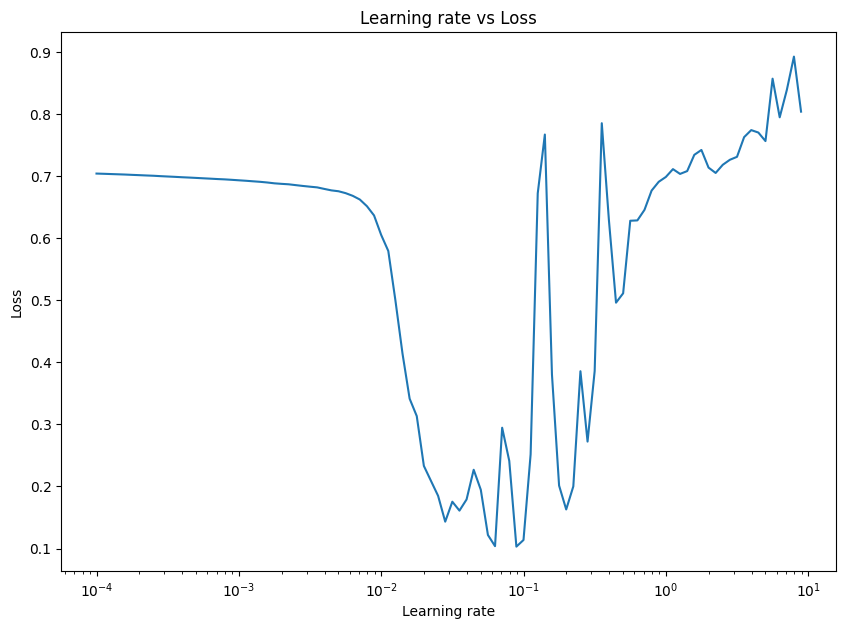

In [ ]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [ ]:
# Example of other typical leaning rates values

1e0, 1e-1, 1e-2, 1e-3, 1e-4

(1.0, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Lets try useing a high *ideal* learning rate with the same model

# set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model

model_10.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=['accuracy'])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=200)

Epoch 1/200
25/25 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.4950
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4963
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4988
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5075
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5013
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5050
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5050
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5113
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5100
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.4988
Epoch 11/

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1947 - accuracy: 0.9550


[0.19472791254520416, 0.9549999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation


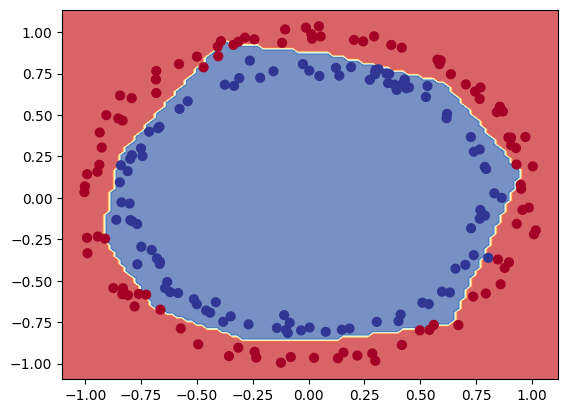

In [ ]:
plot_decision_boundary(model_10, X_test, y_test)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation
313/313 [==============================] - 1s 3ms/step
doing binary classifcation


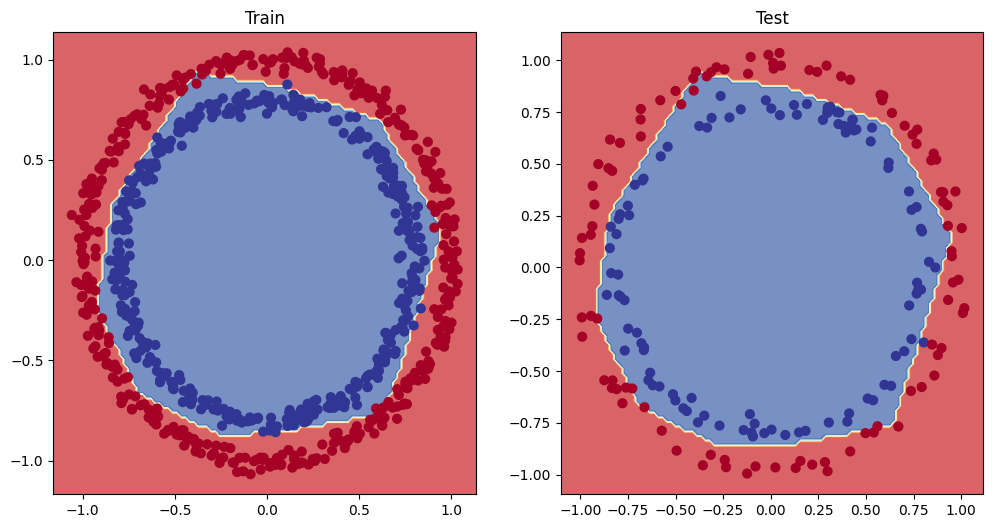

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

<Axes: xlabel='epochs'>

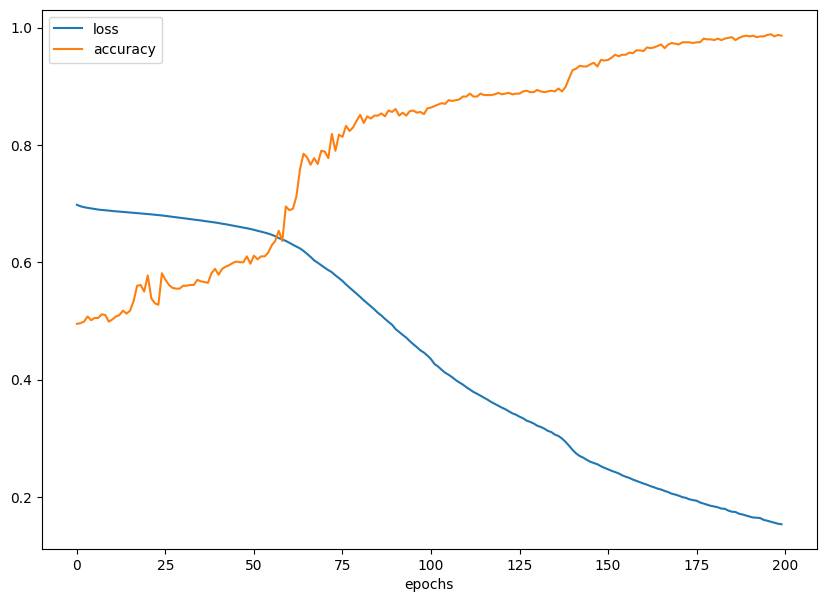

In [ ]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

##More classification evaluation metods

Alongside visualizing our models as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:

* Accuracy
* Precisin
* Recall
* F1-score
* Confusion matrix
* Classification report (from sklearn)

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)

print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 12ms/step - loss: 0.1947 - accuracy: 0.9550
Model loss on the test set: 0.19472791254520416
Model accuracy on the test set: 95.50%


How about a confusion matrix?

In [ ]:
confusion = tf.math.confusion_matrix(y_test, tf.round(model_10.predict(X_test)))

confusion

7/7 [==============================] - 0s 8ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[92,  8],
       [ 1, 99]], dtype=int32)>

In [ ]:
import seaborn as sns

##How about we prettify our confusion matrix?

7/7 [==============================] - 0s 2ms/step


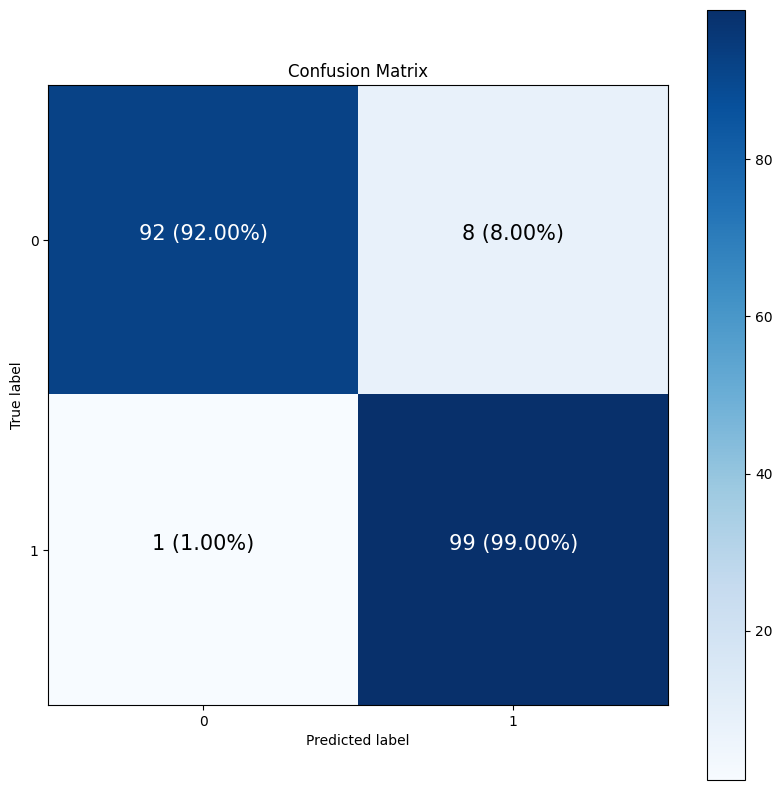

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(model_10.predict(X_test)))
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title='Confusion Matrix',
       xlabel='Predicted label',
       ylabel='True label',
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

threshould = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{(cm[i, j])} ({cm[i, j]:.2f}%)",
           horizontalalignment='center',
           color='white' if cm[i, j] > threshould else 'black',
           size=15)

  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

Text(95.72222222222221, 0.5, 'Predicted label')

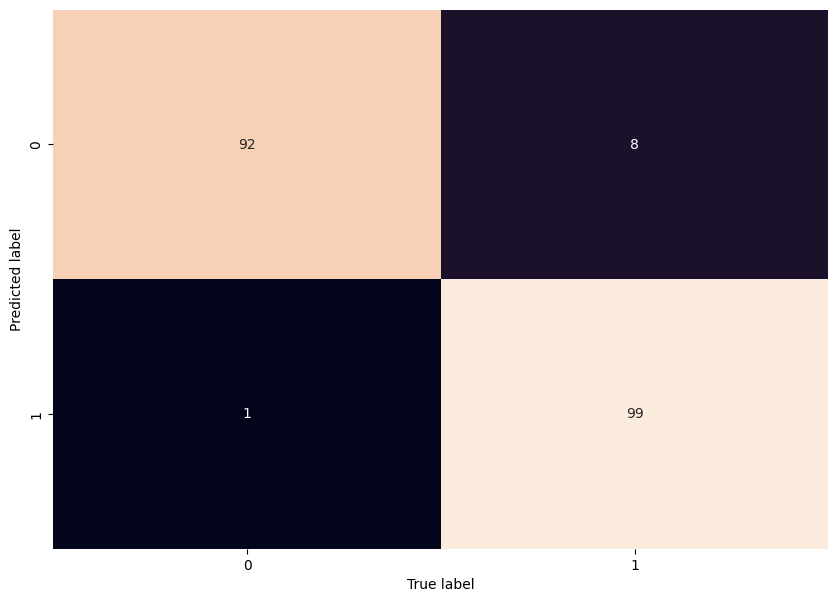

In [ ]:
# Create a confusion matrix


plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='g', cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')

#Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's known as **multi-class classification**.

* This means if you have 3 different clases, it's multi-class classification.
* It also means if you have 100 different classes, it's multi-class classification


To practice multi-class classification, we're ging to build a neural network to classify images of different items of clothing.

[Playground test 2](https://https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=7,7,7,7,7,7&seed=0.19590&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

[PLayground test 3](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8,8,8,8,8,8&seed=0.84295&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false)

[Git hub fashion mnist](https://github.com/zalandoresearch/fashion-mnist)

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

#The data has already been sorted into trining and test sets fror us


(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [8]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
#Show teh first trainnig example

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [10]:
import matplotlib.pyplot as plt

In [11]:
train_data[0].shape, test_labels[0].shape

((28, 28), ())

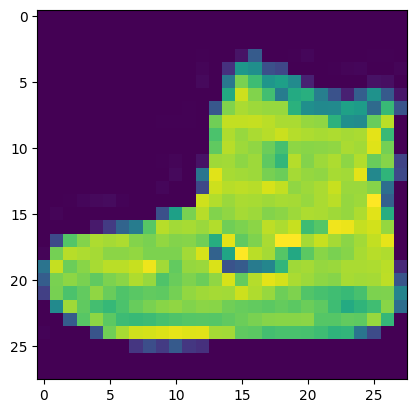

In [12]:
plt.imshow(train_data[0])
plt.show()

In [13]:
# Check out samples label
train_labels[0]

9

In [14]:
# Create a small so we can index onto our training labesl so they're human-readble

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

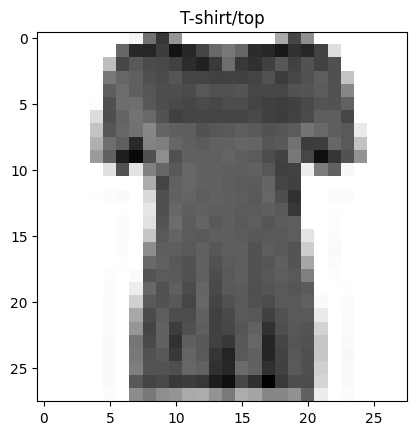

In [15]:
#Plot an example image and its label
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])
plt.show()

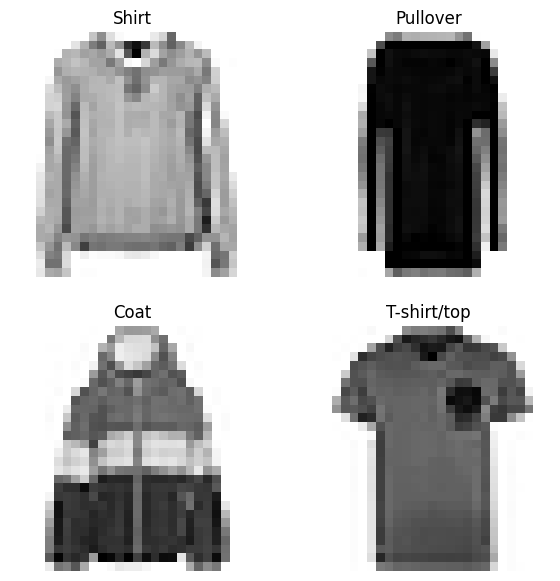

In [16]:
#Plot multiple random images

import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

##Let's build a muilt-class calssification model

For ur multi class calssification model, we can use a similar architecture to our binary classifiers, however, we're going to have tweak a few thing

* Input shape = 28 x 28 (the shape of one image)
* output shape = 10 (one per class of clothing)
* Loss function = tf.keras.categoricalCrossentropy()
  * If your labels are hot encoded, use:
  CategoricalCrossentropy()
  * If your label are integer from user:
  SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [17]:
train_data[0].shape

(28, 28)

In [18]:
# Our data need to be flattened (from 28 x 28 to None, 784 )
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])

flatten_model.output_shape

(None, 784)

In [19]:
28 * 28

784

In [20]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
#set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(
    train_data,  # Normalize the pixel values
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data, tf.one_hot(test_labels, depth=10))
  )


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3513 - accuracy: 0.0993 - val_loss: 2.3023 - val_accuracy: 0.1002
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2998 - accuracy: 0.1022 - val_loss: 2.2839 - val_accuracy: 0.1082
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2703 - accuracy: 0.1135 - val_loss: 2.2619 - val_accuracy: 0.1190
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2667 - accuracy: 0.1170 - val_loss: 2.2490 - val_accuracy: 0.1223
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2334 - accuracy: 0.1293 - val_loss: 2.1905 - val_accuracy: 0.1503
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1774 - accuracy: 0.1541 - val_loss: 2.1204 - val_accuracy: 0.1672
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8301 - accuracy: 0.2333 - val_loss: 1.7255 - val_accuracy:

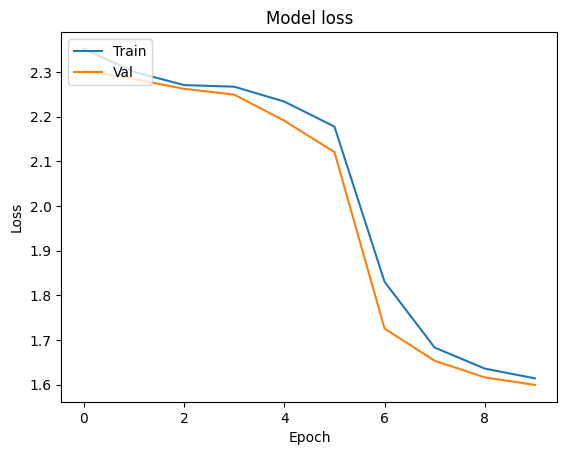

In [22]:
plt.plot(non_norm_history.history['loss'])
plt.plot(non_norm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
# Check the model summary

model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# chekc the mim and max of the trinning data

train_data.min(), train_data.max()

(0, 255)

Neural networks prefer dta to be scaled (or normalizae), this means they like to have numbers in the tensors they try to find patterns between 0 & 1.

In [25]:
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [26]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [27]:
# Now oru dta is normalized , lets bil a model to fin patterns in it
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])

model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

norm_history = model_12.fit(
    train_data_norm,  # Normalize the pixel values
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    validation_data=(test_data_norm, # Normalize the pixel values
                      tf.one_hot(test_labels, depth=10)
                     )
    )

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2158 - accuracy: 0.5282 - val_loss: 0.7871 - val_accuracy: 0.7159
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7120 - accuracy: 0.7457 - val_loss: 0.6951 - val_accuracy: 0.7465
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6388 - accuracy: 0.7743 - val_loss: 0.6484 - val_accuracy: 0.7673
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6042 - accuracy: 0.7879 - val_loss: 0.6137 - val_accuracy: 0.7853
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5854 - accuracy: 0.7956 - val_loss: 0.6194 - val_accuracy: 0.7789
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5718 - accuracy: 0.8001 - val_loss: 0.6058 - val_accuracy: 0.7899
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5644 - accuracy: 0.8025 - val_loss: 0.6175 - val_accuracy:

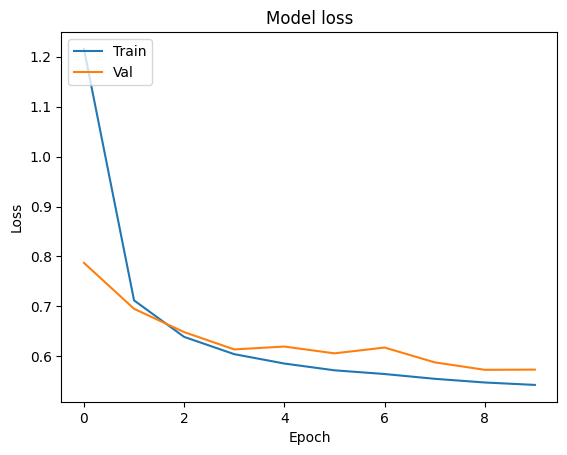

In [28]:
plt.plot(norm_history.history['loss'])
plt.plot(norm_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

>🔑 **Note:** neural networks tend to prefer dta in numerical form as well as scalled/normalized (number between zero and one)

<Axes: title={'center': 'Nomralized'}, xlabel='epochs'>

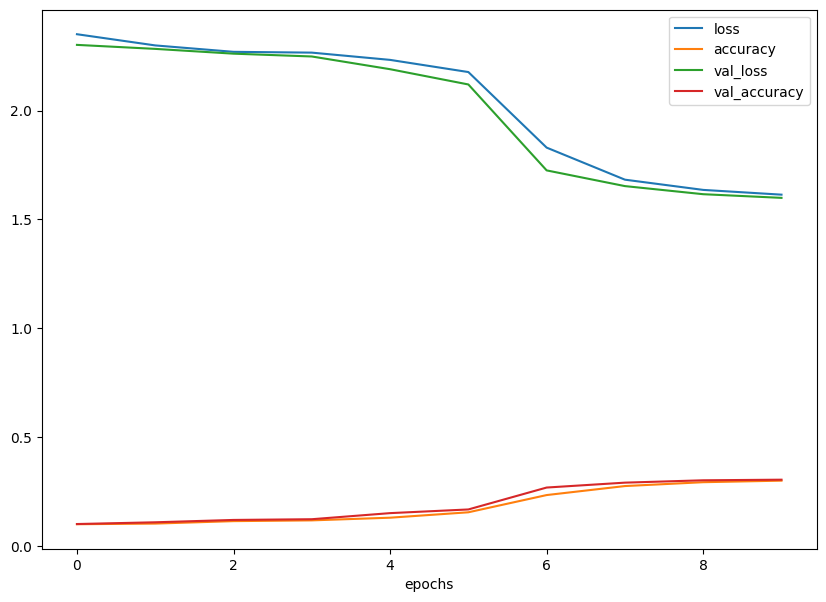

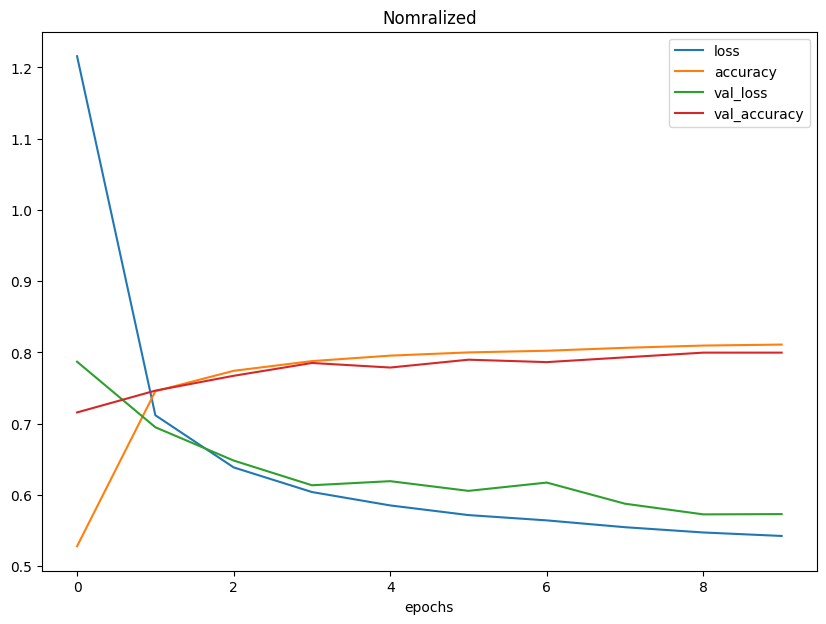

In [30]:
import pandas as pd

# Plot non-normlaizxed data

pd.DataFrame(non_norm_history.history).plot(figsize=(10, 7), xlabel="epochs", title="Non-normalized")


pd.DataFrame(norm_history.history).plot(figsize=(10, 7), xlabel="epochs", title="Nomralized")


🔑 **Note:** the same model with even *slightly* different data ca produce *dramatically* dofferent results. SO when you're comparing models, it's important to make sure you're comparing them on the same criteria (e. g. same architecture but different dat or same dat but different archtecture).

## Finding the ideal learning rate

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])


model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_13.fit(
    train_data_norm,
    tf.one_hot(train_labels, depth=10),
    epochs=10,
    callbacks=[lr_scheduler],
    validation_data=(
        test_data_norm,
        tf.one_hot(test_labels, depth=10))
    )

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2173 - accuracy: 0.5785 - val_loss: 0.8703 - val_accuracy: 0.7181 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7652 - accuracy: 0.7396 - val_loss: 0.7385 - val_accuracy: 0.7433 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6765 - accuracy: 0.7619 - val_loss: 0.6760 - val_accuracy: 0.7576 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6309 - accuracy: 0.7793 - val_loss: 0.6344 - val_accuracy: 0.7790 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6031 - accuracy: 0.7878 - val_loss: 0.6100 - val_accuracy: 0.7856 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5884 - accuracy: 0.7915 - val_loss: 0.6624 - val_accuracy: 0.7637 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 4s

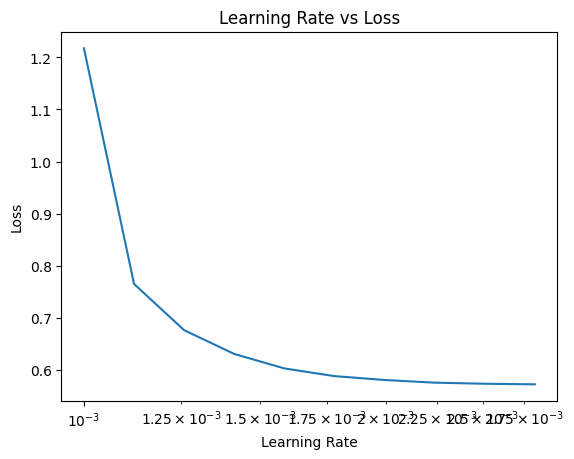

In [34]:
# Plot the learnig rate decay curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(10)/20))
plt.semilogx(lrs, model_13.history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')
plt.show()

In [35]:
10e-3

0.01

In [37]:
# Let's refit a moel with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
  ])


# compile mdoel
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])
# Fite the model
model_14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(
          test_data_norm,
          test_labels
        )
    )

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2425 - accuracy: 0.5294 - val_loss: 0.8675 - val_accuracy: 0.7060
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7486 - accuracy: 0.7516 - val_loss: 0.6948 - val_accuracy: 0.7634
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6506 - accuracy: 0.7798 - val_loss: 0.6591 - val_accuracy: 0.7702
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6204 - accuracy: 0.7885 - val_loss: 0.6445 - val_accuracy: 0.7814
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6033 - accuracy: 0.7933 - val_loss: 0.6271 - val_accuracy: 0.7854
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5927 - accuracy: 0.7962 - val_loss: 0.6596 - val_accuracy: 0.7782
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5860 - accuracy: 0.7997 - val_loss: 0.6504 - val_accuracy:

## Evaluating opur multicall clasification model

To evaluate our multi-class calssification model we could:

* Evaluate its performance using other classification metrics (such as confusion matrix)
* Asses some of its prediction (though visualizations)
* Improve its results (by trining it for longwe or changing the architecture)
* Save and export it for use in and apllication

Lets's got through the step 2...

In [56]:
# Create a confucion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title='Confusion Matrix',
        xlabel='Predicted label',
        ylabel='True label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)


  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  threshould = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{(cm[i, j])} ({cm[i, j]/10:.2f}%)",
            horizontalalignment='center',
            color='white' if cm[i, j] > threshould else 'black',
            size=15)



In [39]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [44]:
y_probs = model_14.predict(test_data_norm)

y_probs[:5]

313/313 [==============================] - 1s 4ms/step


array([[5.7586608e-10, 4.9556659e-14, 5.1160756e-11, 4.3717616e-09,
        1.1002652e-07, 1.0283631e-01, 8.0164293e-09, 8.0774903e-02,
        1.4661826e-04, 8.1624198e-01],
       [5.4956822e-06, 1.1902057e-06, 8.6570740e-01, 2.0955711e-07,
        9.0292692e-02, 1.3430709e-15, 4.3993060e-02, 5.3290591e-37,
        4.5580098e-08, 7.5644743e-30],
       [5.8483958e-05, 9.8875636e-01, 1.9267929e-05, 3.4724998e-03,
        1.5546664e-05, 3.7200519e-04, 1.6149685e-05, 7.2812168e-03,
        1.9888935e-06, 6.4074857e-06],
       [5.8483958e-05, 9.8875636e-01, 1.9267929e-05, 3.4724998e-03,
        1.5546664e-05, 3.7200519e-04, 1.6149685e-05, 7.2812168e-03,
        1.9888935e-06, 6.4074857e-06],
       [1.3185762e-01, 7.2259450e-04, 2.0914909e-01, 2.6734293e-02,
        5.1448412e-02, 4.4148987e-06, 5.7878530e-01, 5.2417310e-16,
        1.2983792e-03, 1.1000424e-14]], dtype=float32)

🔑 **Note:** Remenber to make predicitions on teh same type of data your mdoel was trained on (e.g. if your model was trained on normalized data, you'll want make predicitions on normalized data)

In [45]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([5.7586608e-10, 4.9556659e-14, 5.1160756e-11, 4.3717616e-09,
        1.1002652e-07, 1.0283631e-01, 8.0164293e-09, 8.0774903e-02,
        1.4661826e-04, 8.1624198e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [46]:
# convert all of the predictions probabilities int integers

y_preds = y_probs.argmax(axis=1)

# View the first 10 predictions labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [48]:
for i in y_preds[:20]:
  print(class_names[i])

Ankle boot
Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker
Coat
Sandal
Sandal
Dress
Coat
Trouser
Pullover
Coat
Bag
T-shirt/top


In [50]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                            y_pred=y_preds)

array([[719,   1,  15, 125,   4,   2, 123,   0,  11,   0],
       [  2, 906,   7,  75,   4,   0,   5,   0,   1,   0],
       [ 19,   1, 584,  38, 228,   0, 126,   0,   4,   0],
       [ 25,  20,  15, 860,  39,   1,  36,   0,   4,   0],
       [  2,   0,  77,  54, 784,   0,  75,   0,   8,   0],
       [  1,   0,   0,   3,   1, 864,   0,  72,  12,  47],
       [135,   0,  90,  90, 172,   1, 492,   0,  20,   0],
       [  0,   1,   0,   0,   0,  29,   0, 914,   0,  56],
       [  8,   1,   2,   8,  12,  16,  45,   4, 899,   5],
       [  0,   0,   0,   0,   1,  14,   0,  56,   2, 927]])

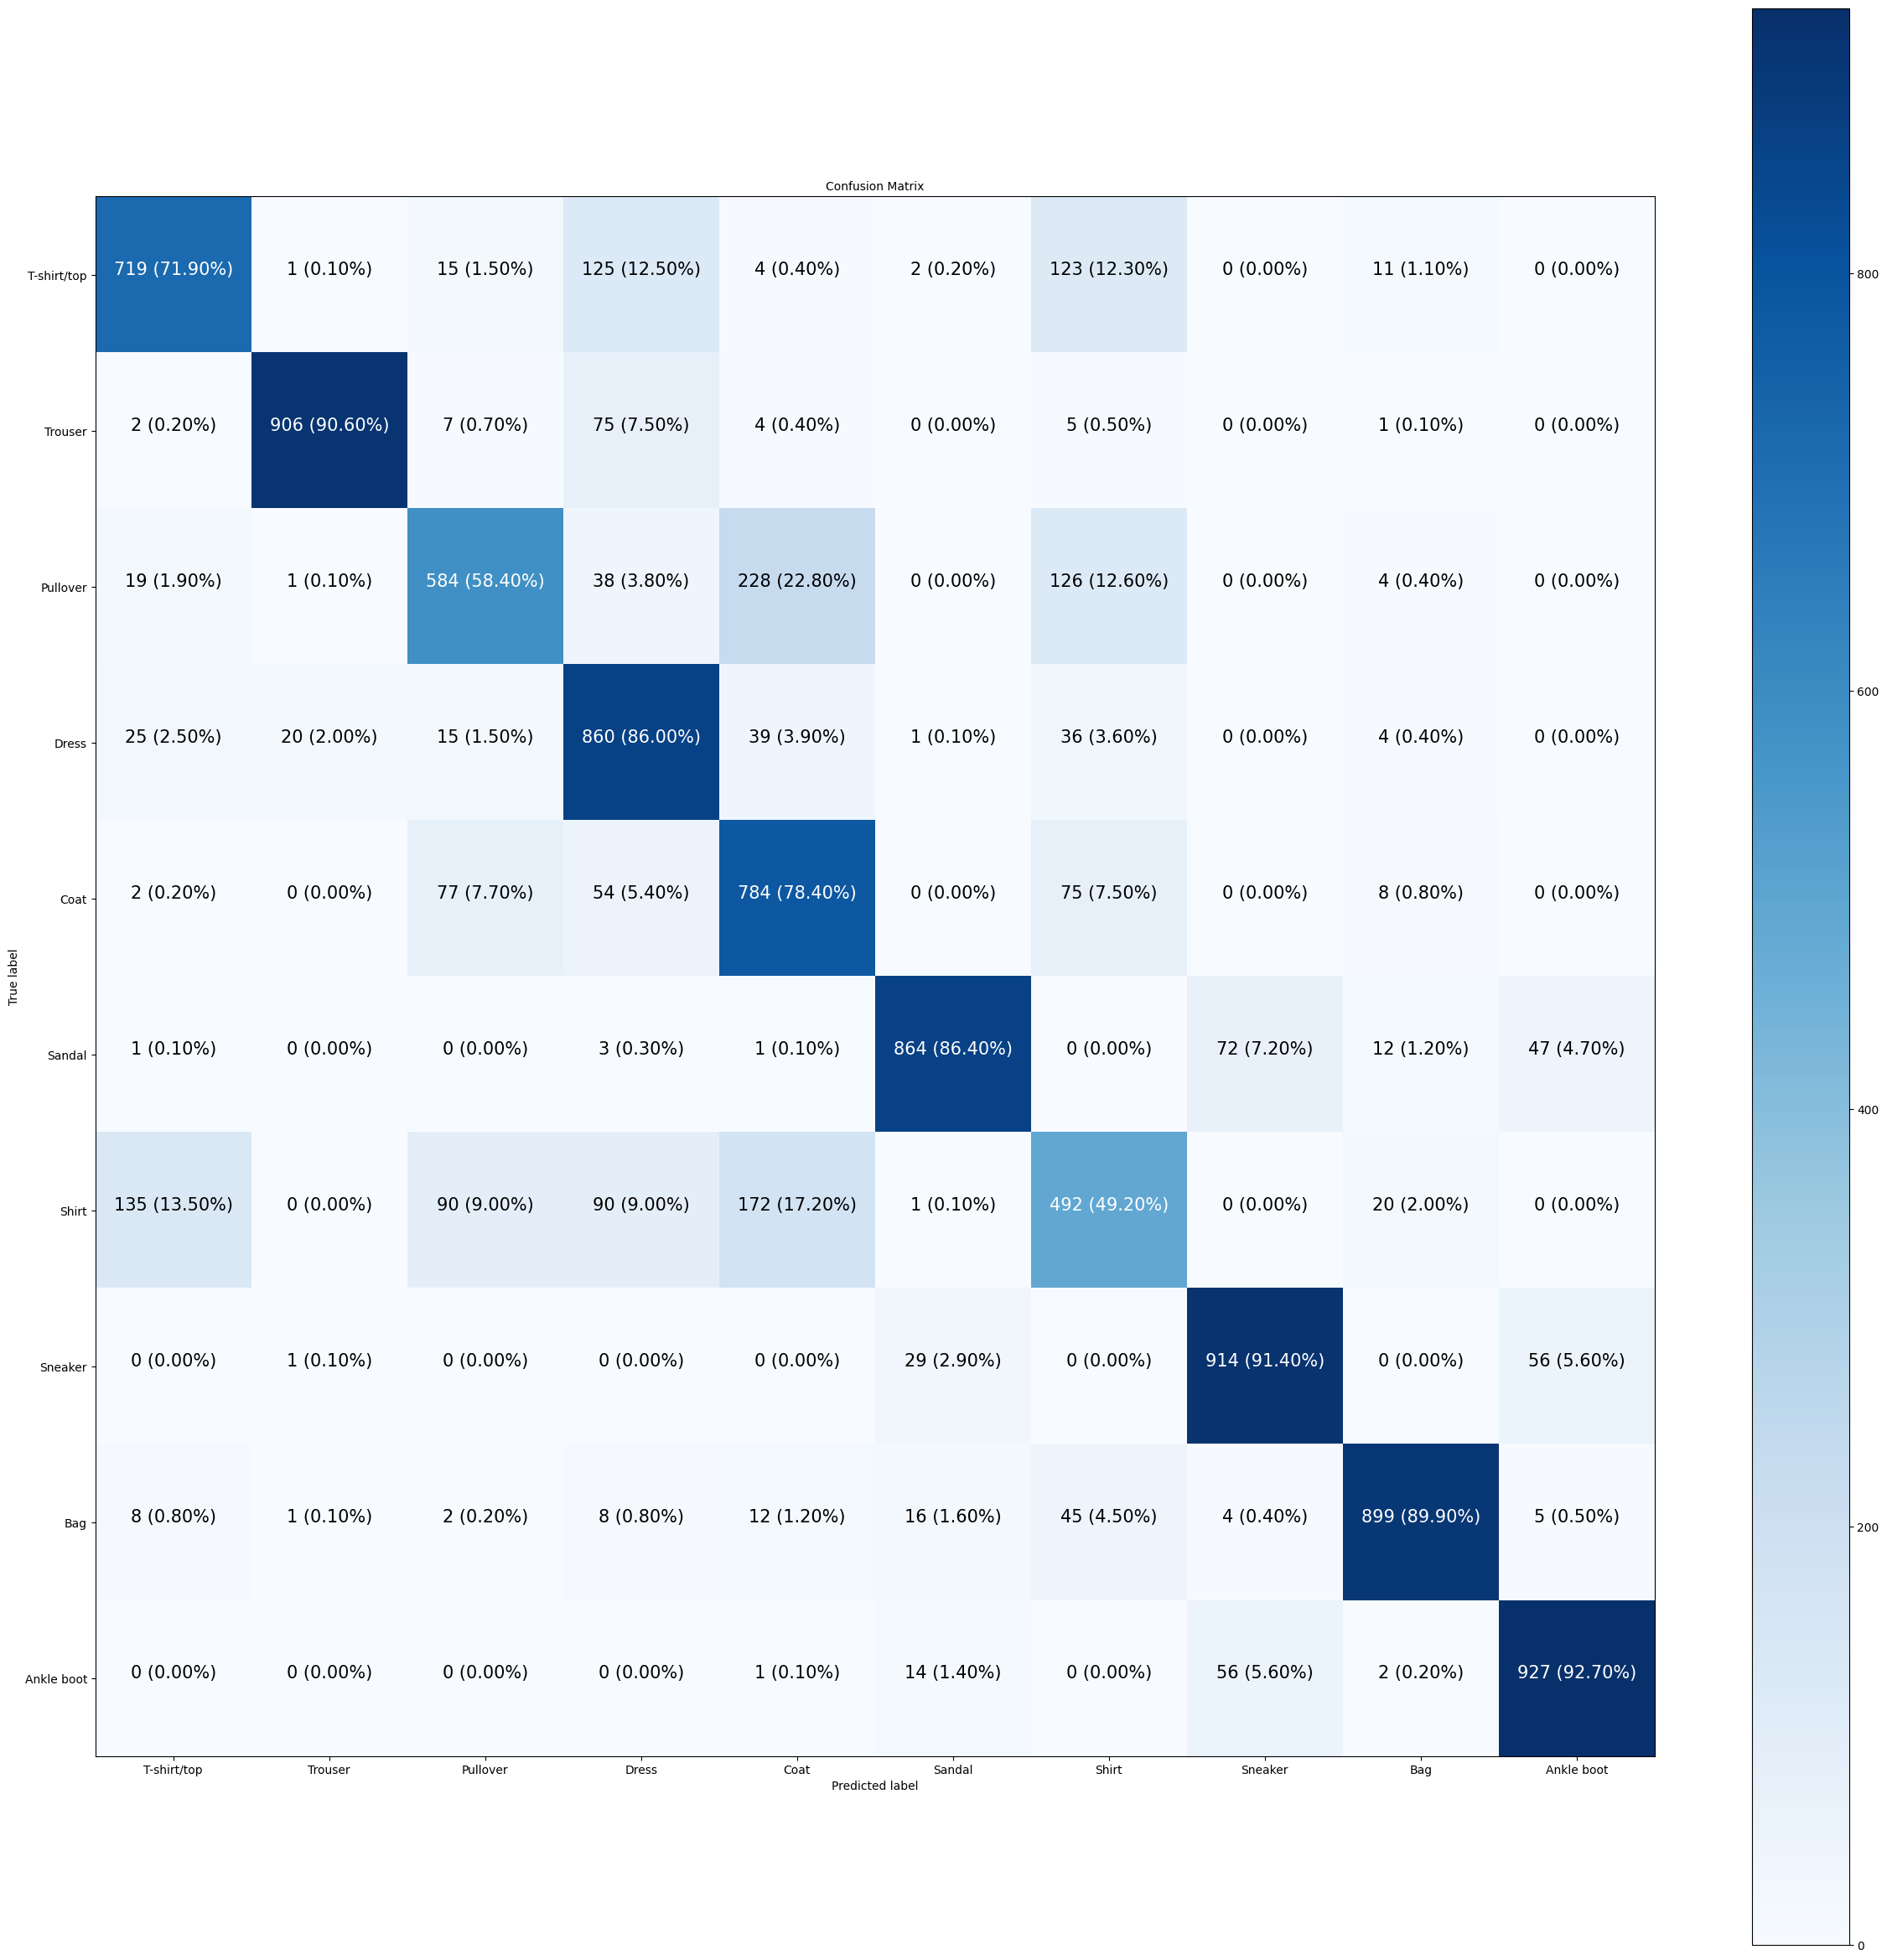

In [57]:
# Make a prettier confucion matrix


make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(30, 30),
                      text_size=10
                      )

🔑 **Note:** Often when working with images and other forms of visual dat, it's as good idea visualize as much as possible to develop a futher understanding of the dta and the inputs and outputs of your models.

How about a fun little function for:

* Plot a random image
* Make a prediction
* Lable the plot with the truth label & the predict label

In [77]:
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  i = random.randint(0, len(images) - 1)
  target_image = images[i]

  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    title_color = 'green'
  else:
    title_color = 'red'

  plt.xlabel("Pred:{} {:2.0f}% (True:{})".format(
                    pred_label,
                    100 * tf.reduce_max(pred_probs),
                    true_label
                  ),
              color=title_color
             )



1/1 [==============================] - 0s 31ms/step


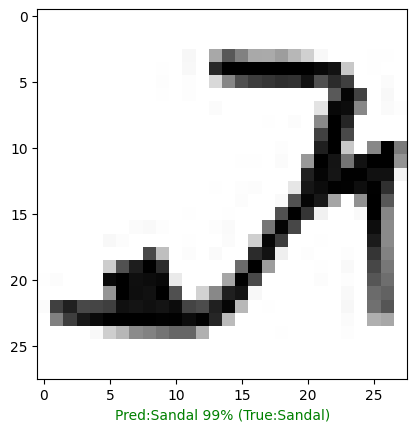

In [83]:
plot_random_image(model=model_14,
                  images=test_data_norm, # always make prediction on the same data your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## What patterns exactly our model learning?

In [84]:
# Find the layers of our most recent model

model_14.layers

In [86]:
# Extract a particulat layer

model_14.layers[1]

In [87]:
# Get the patterns of the layer

weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[-0.10828539, -0.08295691, -0.7116618 ,  0.04291743],
        [ 0.396544  , -0.6726498 , -0.5010485 , -0.08443049],
        [ 0.90141606, -0.8136182 ,  0.28017467, -0.0026799 ],
        ...,
        [ 0.13559054, -0.13252065, -0.13762665, -0.06989862],
        [-0.19977182,  0.4261757 , -0.33649185, -0.08504047],
        [ 0.5990891 , -0.20817243,  0.10972162, -0.06257427]],
       dtype=float32),
 (784, 4))

In [92]:
28 * 28

784

In [91]:
  model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Now let's checkout bias vector...

In [93]:
# Bias and biases shapes

biases, biases.shape

(array([ 1.3341695 ,  1.5870808 ,  1.8210977 , -0.05337092], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of this is paired with a weight matrix.

The bias vector get initialized as zeros (at least in the case of a Tensorflow dense layer).

The bias vector dictates how much the patterns with in the correpsonding weights matrix should influence the next layer.

In [94]:
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


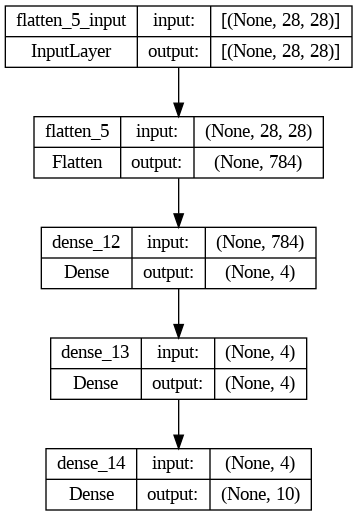

In [95]:
# Let's check out anotehr way of viewing our deep learning models

from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes=True)

In [38]:
model_14.evaluate(test_data_norm, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.7949


[0.6128071546554565, 0.7949000000953674]